## D212 Data Mining 2 PA 2
##### Submitted By Edwin Perry
### Table of Contents
<ol>
    <li><a href="#A">Research Question</a></li>
    <li><a href="#B">Technique Justification</a></li>
    <li><a href="#C">Data Preparation</a></li>
    <li><a href="#D">Analysis</a></li>
    <li><a href="#E">Data Summary and Implications</a></li>
    <li><a href="#F">Sources</a></li>
</ol>


<h4 id="A">Research Question</h4>
<h5>Question</h5>
<p>The research question for this analysis is "Can using Principal Component Analysis (PCA) be used to produce dimensions that can be used to effectively predict customer churn?" This question helps to drive the success of the business, as it enables the business to understand customer sentiment and likelihood of losing a customer, potentially helping the business to reduce customers lost and prepare earlier for new customer acquisition</p>
<h5>Goal of Analysis</h5>
<p>The goal of the analysis is to create composite features that can be used to accurately predict customer churn. The telecommunications industry has a high customer acquisition cost, which means identifying customers that are likely to churn in the future allow the business to take actions to maximize revenue, ideally by finding a way to keep customers, as the cost to acquire a new customer is usually 10 times the cost to retain a customer. If composite features can be used to create effective ways to identify the customers likely to churn, the business would be able to utilize this information to attempt to retain customers</p>
<h4 id="B">Technique Justification</h4>
<h5>Method Explanation</h5>
Principal Component Analysis is a useful technique in data analysis. Specifically, PCA allows an analyst to reduce the number of dimensions being considered by a model, allowing the analyst to extract composite features. In this process, a large number of features are combined with various weights, the weights representing the significance of the original components. These composite features allow for different dimensions to be considered as part of one larger dimension that can be more useful at deriving insights within the analysis. My anticipated outcome of PCA would be a significant reduction to the number of dimensions being considered, using the explained_variance_ratio attribute, which would be optimized for use in further analysis.</p>
<h5>Assumptions of PCA</h5>
<p>One of the assumptions that I must make for PCA to be valid is that there are no outliers (or that the impact of outliers in minimal). PCA uses eigenvectors to determine principal components, and as such, a single or handful of extreme values can lead to misleading results. As such, we will be filtering outliers in our analysis, to ensure that the PCA can be validly performed.</p>
<h4 id="C">Data Preparation</h4>
<h5>Continuous Variable Identification</h5>
<p>The PCA dimension reduction will be performed specifically on continuous variables, though any quantifiable data is valid, as the rubric specifically states to perform this analysis on continuous variables. The ones relevant for the analysis are as follows:
<ul>
<li>Tenure: The number of months that the customer has been a customer of the telecommunications company</li>
<li>Income: The annual income in dollars of the customer</li>
<li>Bandwidth_gb_year: The amount of data a customer uses in a year</li>
<li>Outage_sec_perweek: The average number of seconds the customer's neighborhood experiences on a weekly basis</li>
</ul>
</p>
<h5>Standardization</h5>
<p>Before the data can be used in the analysis, there are certain steps required to prepare the data, including standardizing the values from the continuous columns. The following code is the entirety of the process used to prepare this data:</p>

In [71]:
import pandas as pd
from pandas.api.types import CategoricalDtype
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from scipy import stats


In [72]:
data = pd.read_csv("./Data Source/churn_clean.csv")
pd.set_option("display.max_columns", None)
print(data.head())
data['Income'].fillna(data['Income'].median(), inplace=True)
data["Tenure"].fillna(data["Tenure"].median(), inplace=True)
data["MonthlyCharge"].fillna(data["MonthlyCharge"].median(), inplace=True)
data["Email"].fillna(data["Email"].median(), inplace=True)
data["Contacts"].fillna(data["Contacts"].median(), inplace=True)
data["Age"].fillna(data["Age"].median(), inplace=True)
data["Bandwidth_GB_Year"].fillna(data["Bandwidth_GB_Year"].median(), inplace=True)
data.dropna(how='any',inplace=True)
zscores = stats.zscore(data['Income'])
data['IncomeZScore'] = zscores
zscores = stats.zscore(data['Tenure'])
data['TenureZScore'] = zscores
zscores = stats.zscore(data['MonthlyCharge'])
data['MonthlyChargeZScore'] = zscores
zscores = stats.zscore(data['Email'])
data['EmailZScore'] = zscores
zscores = stats.zscore(data['Contacts'])
data['ContactsZScore'] = zscores
zscores = stats.zscore(data['Age'])
data['AgeZScore'] = zscores
zscores = stats.zscore(data['Bandwidth_GB_Year'])
data['Bandwidth_GB_YearZScore'] = zscores
data = data.query("(IncomeZScore < 3 & IncomeZScore > -3) & (TenureZScore < 3 & TenureZScore > -3) & (MonthlyChargeZScore < 3 & MonthlyChargeZScore > -3) & (Bandwidth_GB_YearZScore < 3 & Bandwidth_GB_YearZScore > -3) & (EmailZScore < 3 & EmailZScore > -3) &  (AgeZScore < 3 & AgeZScore > -3) & (ContactsZScore < 3 & ContactsZScore > -3)")
data = data.drop(columns=['IncomeZScore', 'TenureZScore', 'MonthlyChargeZScore', 'EmailZScore', 'ContactsZScore', 'AgeZScore', 'Bandwidth_GB_YearZScore', 'Customer_id'])
data["Churn"] = data["Churn"].apply(lambda x: 1 if x == "Yes" else 0)


   CaseOrder Customer_id                           Interaction  \
0          1     K409198  aa90260b-4141-4a24-8e36-b04ce1f4f77b   
1          2     S120509  fb76459f-c047-4a9d-8af9-e0f7d4ac2524   
2          3     K191035  344d114c-3736-4be5-98f7-c72c281e2d35   
3          4      D90850  abfa2b40-2d43-4994-b15a-989b8c79e311   
4          5     K662701  68a861fd-0d20-4e51-a587-8a90407ee574   

                                UID         City State                 County  \
0  e885b299883d4f9fb18e39c75155d990  Point Baker    AK  Prince of Wales-Hyder   
1  f2de8bef964785f41a2959829830fb8a  West Branch    MI                 Ogemaw   
2  f1784cfa9f6d92ae816197eb175d3c71      Yamhill    OR                Yamhill   
3  dc8a365077241bb5cd5ccd305136b05e      Del Mar    CA              San Diego   
4  aabb64a116e83fdc4befc1fbab1663f9    Needville    TX              Fort Bend   

     Zip       Lat        Lng  Population      Area             TimeZone  \
0  99927  56.25100 -133.37571          3

/tmp/ipykernel_8181/645862620.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Income'].fillna(data['Income'].median(), inplace=True)
/tmp/ipykernel_8181/645862620.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=Tr

In [73]:
# Select the columns for PCA
pca_columns = ['Income', 'Tenure', 'Age', 'Lat', 'Lng', 'Bandwidth_GB_Year', 'Outage_sec_perweek', 'Population']
pca_data = data[pca_columns]

# Standardize the data
scaler = StandardScaler()
pca_data_scaled = scaler.fit_transform(pca_data)



<h4 id="D">Analysis</h4>
<h5>Principal Component Matrix</h5>
Now, the data is standardized and cleaned, so we can begin reducing dimensionality using PCA. We will instantiate the PCA object below and use the fit_transform() function to both fit and transform the data

In [74]:
# Perform PCA
pca = PCA(n_components=8, random_state=400)
pca_data_transformed = pca.fit_transform(pca_data_scaled)

# Create a DataFrame with the PCA results
pca_df = pd.DataFrame(pca_data_transformed, columns=[f'PC{i+1}' for i in range(pca_data_transformed.shape[1])])

# Display the explained variance ratio
explained_variance = pca.explained_variance_ratio_
print('Cumulative variance ratio:', explained_variance.cumsum())

# Add the PCA results back to the original dataframe
data = pd.concat([data.reset_index(drop=True), pca_df.reset_index(drop=True)], axis=1)
pca_loadings = pd.DataFrame(pca.components_.T, columns=["PC1", "PC2", "PC3", "PC4", "PC5", "PC6", "PC7", "PC8"], index = pca_columns)
pca_loadings

Cumulative variance ratio: [0.24903624 0.40315544 0.53291081 0.66136896 0.7857053  0.90700007
 0.99895487 1.        ]


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
Income,-0.010047,0.124881,0.178131,-0.074785,0.972220,0.040895,-0.009752,-0.001381
Tenure,0.706576,0.023715,0.005693,-0.016394,0.000513,0.011902,0.006563,-0.706896
Age,-0.003253,-0.058274,0.408979,-0.557661,-0.140398,0.704574,-0.041314,0.022397
Lat,-0.031875,0.710022,-0.145663,-0.096087,-0.069392,0.092605,0.671573,0.000758
Lng,0.007401,-0.108566,0.756670,0.534965,-0.079110,-0.019976,0.350376,0.000302
Bandwidth_GB_Year,0.706629,0.025365,-0.007646,0.002189,0.007069,-0.009148,0.006570,0.706960
Outage_sec_perweek,0.005118,-0.028166,-0.373806,0.597059,0.088035,0.701697,-0.053291,-0.001302
Population,0.014747,-0.680508,-0.259646,-0.176773,0.127293,0.018009,0.649229,0.000342


<p>With the PCA performed, we can now examine the matrix of the PCA loadings, indicating the weight that each feature contributes to the 8 principal components. For example,Tenure and Bandwidth_gb_year have a great deal of influence on PC1, whereas Outage_sec_perweek has very little influence on PC1. Each principal component can be interpreted based on these coefficients.</p>
<h5>Number of Principal Components</h5>
<p>The next step to perform is identifying the number of principal components to consider for this analysis. I will be doing so through the use of an elbow plot</p>

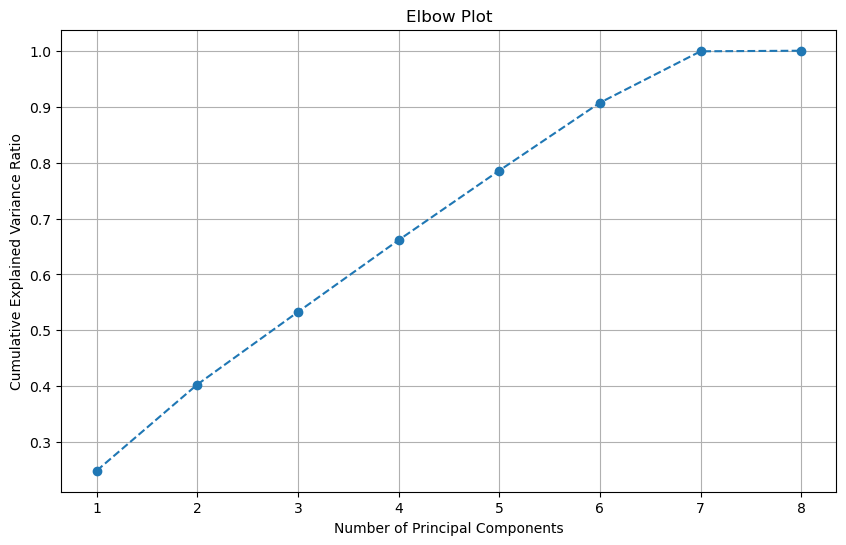

In [75]:

# Plot the cumulative explained variance ratio
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance) + 1), explained_variance.cumsum(), marker='o', linestyle='--')
plt.title('Elbow Plot')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.grid(True)
plt.show()

<p>As we can see in the scree plot above, we find that the variance explained continues to rise rapidly for the first several components. However, once we have reached 7 components, there is very little change. Therefore, the ideal number of principal components to use for this analysis would be 7. This is less than ideal, as this only reduces the number of dimensions considered by 1 (we used 8 variables to create these principal components). Even so, this is an improvement that could lead to a better model.</p>
<h5>Variance of each principal component</h5>
Now that we set the number of components to 7, we can identify the variance of each component. 

In [76]:
final_pca = PCA(n_components=7, random_state=500)
final_pca.fit(pca_data_scaled)
X_final_pca = final_pca.transform(pca_data_scaled)
X_final_pca_loadings = pd.DataFrame(final_pca.components_.T, columns=["PC1", "PC2", "PC3", "PC4", "PC5", "PC6", "PC7"], index = pca_columns)
explained_variance = final_pca.explained_variance_ratio_
print('Cumulative variance ratio:', explained_variance)

Cumulative variance ratio: [0.24903624 0.1541192  0.12975537 0.12845815 0.12433634 0.12129477
 0.0919548 ]


<p>Above, we see the variance accounted for with each principal component, starting with 24.9% with the first principal component, and ending with 9.2% with the final principal component</p>
<h5>Total Variance</h5>
<p>We have already determined the variance that each component takes into account, but a similarly important metric is the overall variance taken into account by the variances cumulatively.</p>

In [77]:
print(f"These 7 principal components cumilatively explain {round(sum(explained_variance * 100), 2)}% of variance")

These 7 principal components cumilatively explain 99.9% of variance


<h5>Analysis</h5>
<p>With the PCA completed, we can now proceed to address the research question. These principal components can now be used in an analysis to predict customer churn. To do so, we will split the data into a test and training set, then use a DecisionTreeClassifier to create a decision tree using the training data. We will then use the test data to determine the accuracy of the decision tree, using a variety of metrics.</p>

In [78]:
y = data["Churn"]
X_train, X_test, Y_train, Y_test = train_test_split(X_final_pca, y, train_size=0.8, test_size=0.2, random_state=500, stratify=y)
classification_model = DecisionTreeClassifier(random_state=500).fit(X_train, Y_train)
y_predictions = classification_model.predict(X_test)
test_accuracy = accuracy_score(Y_test, y_predictions)
print(f"Accuracy of decision tree: {test_accuracy}")
# Predict the test set probabilities of the positive class
y_pred_proba = classification_model.predict_proba(X_test)[:,1]
# Generate Confusion Matrix
final_matrix = confusion_matrix(Y_test, y_predictions)
print("\nThe confusion matrix for this Decision Tree model:")
print("Predicted No Churn  | Predicted Churn")
print(f"                    {final_matrix[0]} Actual No Churn")
print(f"                     {final_matrix[1]} Actual Churn\n")


Accuracy of decision tree: 0.715318869165023

The confusion matrix for this Decision Tree model:
Predicted No Churn  | Predicted Churn
                    [904 203] Actual No Churn
                     [230 184] Actual Churn



<p>The classification models seems to be better at determining churn than random guessing, but does not have a level of accuracy that would indicate a great amount of reliability. The accuracy of the overall decision tree is only 71.5%. The success is also visualized on the below ROC curve.

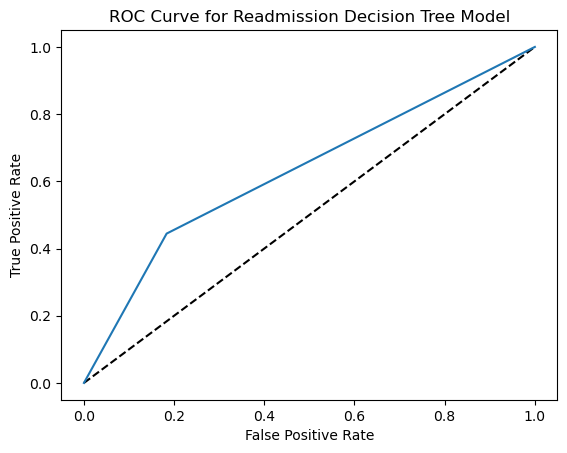

Area Under the Curve (AUC) score: 0.6305329719963867


In [79]:
fpr, tpr, thresholds = roc_curve(Y_test, y_pred_proba)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Readmission Decision Tree Model')
plt.show()
roc_auc = roc_auc_score(Y_test, y_pred_proba)
print(f'Area Under the Curve (AUC) score: {roc_auc}')

<p>Overall, the graph and AUC score reaffirm that the decision tree is better at classification than random guessing, with an AUC score of 0.63, but is certainly not reliable. For context, AUC scores range from 0, indicating no predictive ability, and 1, denoting perfect predictions. With a score of 0.63, the model cannot be considered effective at correctly predicting customer churn. As such, we can say that the principal components generated in the PCA can be used to effectively predict customer churn.</p>

<h4 id="E">Web Sources</h4>
<p><a href="https://app.datacamp.com/learn/custom-tracks/custom-data-mining-ii">Data Camp Tutorial Covering PCA</a></p>
<h4 id="F">Sources</h4>
<p><a href="https://www.geeksforgeeks.org/reduce-data-dimentionality-using-pca-python/">GeeksForGeeks information that covers the conceptual benefits of PCA</a></p>